### Homework 2 Problems

In [90]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#### Problem 1

In [91]:
datasite='http://burro.case.edu/Academics/Astr222/HW/HW2/'
datafile='gc.dat'

In [92]:
glob_clusters=ascii.read(datasite+datafile,header_start=-2,data_start=0)
print(glob_clusters.colnames)

['l', 'b', 'r', 'feh', 'vr']


In [93]:
#define each of the columns
L = glob_clusters['l']
B = glob_clusters['b']
R = glob_clusters['r']
feh = glob_clusters['feh']
vr = glob_clusters['vr']

In [94]:
#Convert to cartisian coordinates
glob_clusters['X'] = R * np.cos(np.deg2rad(L)) * np.cos(np.deg2rad(B))
X = glob_clusters['X']
glob_clusters['Y'] = R * np.sin(np.deg2rad(L)) * np.cos(np.deg2rad(B))
Y = glob_clusters['Y']
glob_clusters['Z'] = R * np.sin(np.deg2rad(B))
Z = glob_clusters['Z']

In [95]:
MP = (feh < -0.8) & (feh != -999)
MR = (feh > -0.8) & (feh != -999)

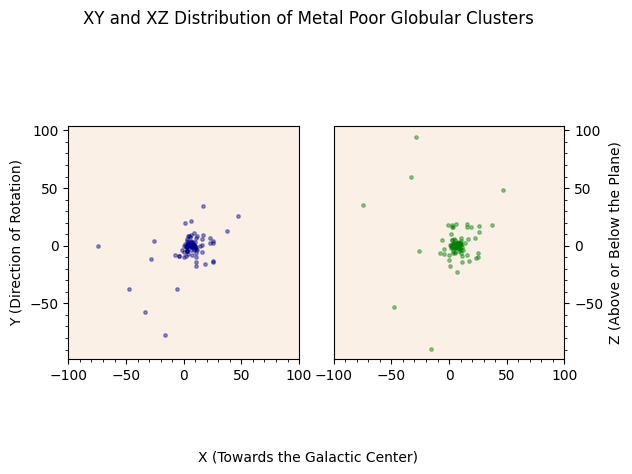

In [96]:
fig , (ax, ax2) = plt.subplots(1,2,sharey= True)

ax.scatter(X[MP], Y[MP], s = 6, color = 'darkblue', alpha = .4, label = 'XY Distribution')
ax.set_ylabel('Y (Direction of Rotation)')


ax2.scatter(X[MP], Z[MP], s = 6, color = 'green', alpha = .4, label = 'XZ Distribution')
# Move the right spine to the left
ax2.spines['right'].set_position(('outward', 0))
# Set the right y-axis to be visible
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
#Labeling plots
ax2.set_ylabel('Z (Above or Below the Plane)')


ax.set_xlim(-100,100)
ax.set_aspect('equal')
ax.set_facecolor("linen")
ax.minorticks_on()

ax2.set_xlim(-100,100)
ax2.set_facecolor("linen")
ax2.minorticks_on()
ax2.set_aspect('equal')

plt.subplots_adjust(wspace=.15)
plt.suptitle("XY and XZ Distribution of Metal Poor Globular Clusters")
fig.text(0.5, 0.04, 'X (Towards the Galactic Center)', ha='center')

plt.show()

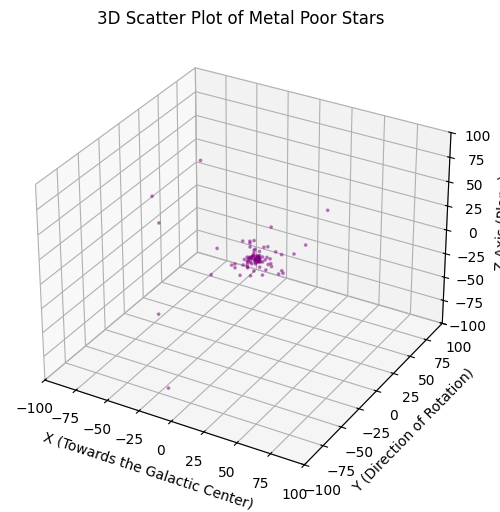

In [97]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(X[MP], Y[MP], Z[MP], c='purple', marker='o', s = 3, alpha = .4)
#ax.scatter(X[MR], Y[MR], Z[MR], c='blue', marker='o', s = 3, alpha= .8)

ax.set_xlabel('X (Towards the Galactic Center)')
ax.set_ylabel('Y (Direction of Rotation)')
ax.set_zlabel('Z Axis (Plane)')
ax.set_title('3D Scatter Plot of Metal Poor Stars')

ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_zlim(-100,100)

# Display the plot
plt.show()

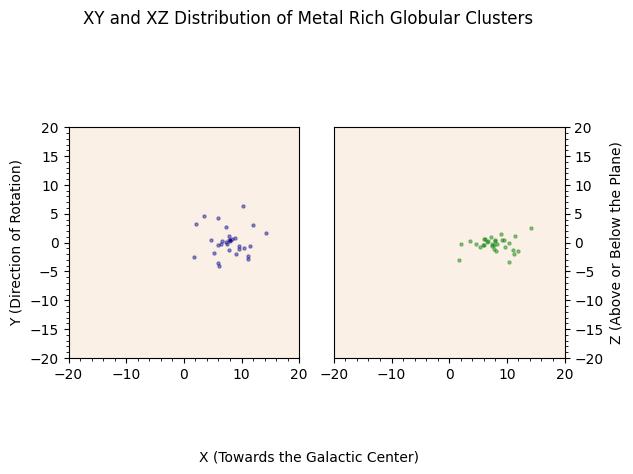

In [98]:
fig , (ax, ax2) = plt.subplots(1,2,sharey= True)

ax.scatter(X[MR], Y[MR], s = 5, color = 'darkblue', alpha = .4, label = 'XY Distribution')
ax.set_ylabel('Y (Direction of Rotation)')



ax2.scatter(X[MR], Z[MR], s = 5, color = 'green', alpha = .4, label = 'XZ Distribution')

# Move the right spine to the left
ax2.spines['right'].set_position(('outward', 0))
# Set the right y-axis to be visible
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
#Labeling plots
ax2.set_ylabel('Z (Above or Below the Plane)')

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
ax.set_facecolor("linen")
ax.minorticks_on()

ax2.set_xlim(-20,20)
ax2.set_ylim(-20,20)
ax2.set_facecolor("linen")
ax2.minorticks_on()
ax2.set_aspect('equal')

plt.subplots_adjust(wspace=.15)
plt.suptitle("XY and XZ Distribution of Metal Rich Globular Clusters")
fig.text(0.5, 0.04, 'X (Towards the Galactic Center)', ha='center')

plt.show()

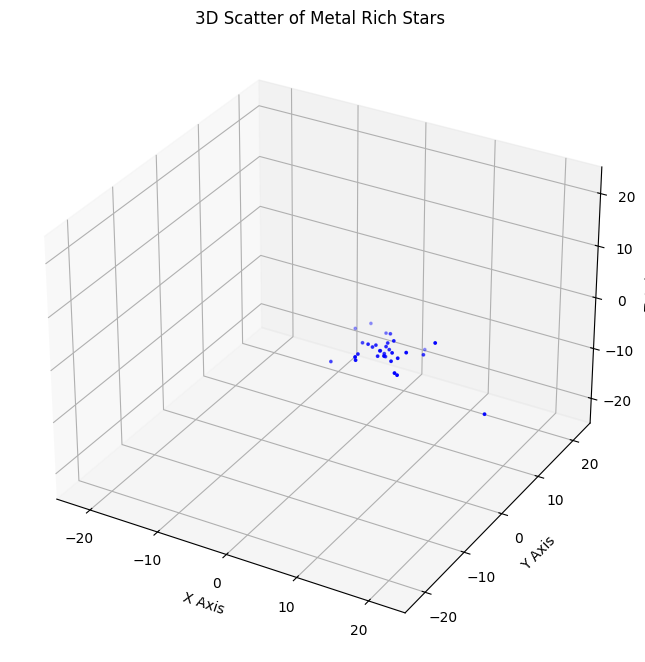

In [99]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(X[MR], Y[MR], Z[MR], c='blue', marker='o', s = 3) 

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Scatter of Metal Rich Stars')

ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
ax.set_zlim(-25,25)

# Display the plot
plt.show()

In [100]:
#Calculating the center of the metal poor and metal rich clusters

mp_x_m = np.mean(X[MP])
mp_y_m = np.mean(Y[MP])
mp_z_m = np.mean(Z[MP])

print("The center of the metal poor cluster is ({:.2f},{:.2f},{:.2f})".format(mp_x_m,mp_y_m,mp_z_m))

mr_x_m = np.mean(X[MR])
mr_y_m = np.mean(Y[MR])
mr_z_m = np.mean(Z[MR])

print("The center of the metal rich cluster is ({:.2f},{:.2f},{:.2f})".format(mr_x_m,mr_y_m,mr_z_m))

The center of the metal poor cluster is (5.58,-1.71,1.52)
The center of the metal rich cluster is (8.25,0.22,-0.52)


Which of the clusters do you feel is more accurate?

I would assume that the metal rich cluster is more accurate. The metal rich cluster is more tightly clustered than the metal rich cluster which means less error from data points that are "outliers."

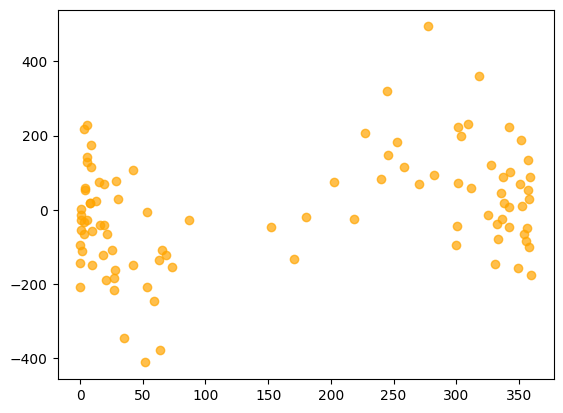

In [101]:
v_mp = (feh < -0.8) & (feh != -999) & (vr != -999)
l_mp = (feh < -0.8) & (feh != -999) & (vr != -999)

plt.scatter(L[l_mp], vr[v_mp], color = 'orange', alpha = .7)

#### Problem 2

In [102]:
datasite='http://burro.case.edu/Academics/Astr222/HW/HW2/'
datafile_o='flynn.dat'

In [103]:
oort_limit=ascii.read(datasite+datafile_o,header_start=-2,data_start=0)
print(oort_limit.colnames)

['star', 'V', 'vr', 'MV']


In [104]:
star = oort_limit['star']
V = oort_limit['V']
vr = oort_limit['vr']
MV = oort_limit['MV']

In [105]:
oort_limit['d'] = 10** ((V - MV + 5) / 5)
d = oort_limit['d']

oort_limit['Z'] = d - 30
Z = oort_limit['Z']

<ErrorbarContainer object of 3 artists>

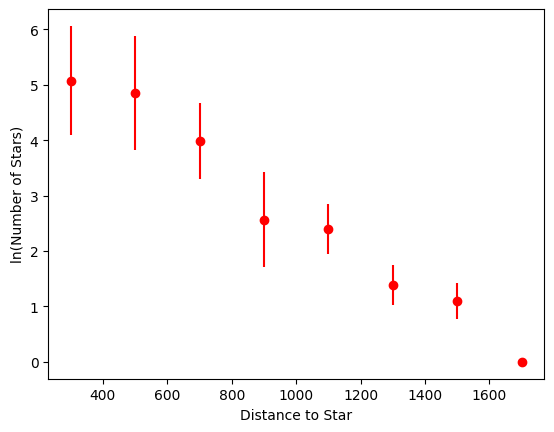

In [106]:
from scipy.stats import binned_statistic


# set up bins in x going from 0 to 4000 in steps of 200
binvals = np.arange(200,2000,200) 
# work out how many points are in each bin (bin_num) as well as 
# the average and standard deviation of the y values in the bins (bin_avg, bin_std)
bin_num, bin_edges, bin_idx = binned_statistic(Z, np.log(star), statistic='count', bins=binvals)
bin_avg, bin_edges, bin_idx = binned_statistic(Z, np.log(star), statistic='mean', bins=binvals)
bin_std, bin_edges, bin_idx = binned_statistic(Z, np.log(star), statistic='std',  bins=binvals)

# this bit of python magic works out the center of each bin
bin_cent = 0.5*(bin_edges[1:]+bin_edges[:-1])

# plot the data
plt.scatter(bin_cent,np.log(bin_num),s=20)
plt.xlabel('Distance to Star')
plt.ylabel('ln(Number of Stars)')

# plot the mean and standard deviation as red points and errorbars
plt.errorbar(bin_cent, np.log(bin_num), yerr=bin_std, fmt='o', color='red')

    slope = -0.004 +/- 0.000
intercept = 6.377 +/- 0.254
  scatter = 127.712
269.79964123865335


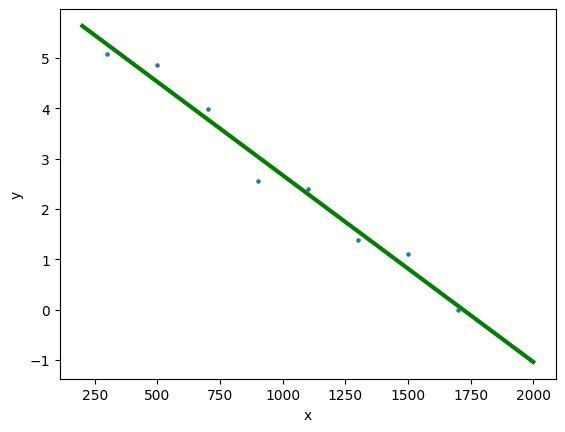

In [107]:
coeff,cov=np.polyfit(bin_cent,np.log(bin_num),1,cov=True)
coeff_err = np.sqrt(np.diag(cov))
print('    slope = {:.3f} +/- {:.3f}'.format(coeff[0],coeff_err[0]))
print('intercept = {:.3f} +/- {:.3f}'.format(coeff[1],coeff_err[1]))
polynomial=np.poly1d(coeff)
print('  scatter = {:.3f}'.format(np.std(star-polynomial(Z))))

print(-1/coeff[0])
# plot the data
plt.scatter(bin_cent,np.log(bin_num),s=5)
plt.xlabel('x')
plt.ylabel('y')

# overplot your fit
xfit=np.linspace(200,2000,200)
plt.plot(xfit,polynomial(xfit),color='green',lw=3)